Oli Kosiacki's Visualizations

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
plane_data = pd.read_csv('data/Merged10yrdata.csv')

C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\2237160067.py:1: DtypeWarning: Columns (7,12,13,14,21,22,32,33,44) have mixed types. Specify dtype option on import or set low_memory=False.
  plane_data = pd.read_csv('data/Merged10yrdata.csv')


In [4]:
plane_data.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,...,FAR,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl
0,CEN15WA455,ACC,94012,2015-01-01T05:00:00Z,Beja,NaN,Portugal,NaN,CS-UJF,12961080,...,NaN,Destroyed,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN
1,WPR15CA073,ACC,90556,2015-01-01T17:07:00Z,Yuma,Arizona,United States,NaN,N2841N,13102,...,91,Substantial,VMC,ROVEY JAMES A,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90556,https://data.ntsb.gov/carol-repgen/api/Aviatio...
2,ERA15CA093,ACC,90576,2015-01-01T17:30:00Z,Apalachicola,Florida,United States,NaN,N657MC,4622007,...,91,Substantial,VMC,CHICOLA MONTY V,Taxi,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90576,https://data.ntsb.gov/carol-repgen/api/Aviatio...
3,ERA15CA089,ACC,90559,2015-01-02T17:40:00Z,Barranquitas,Puerto Rico,United States,NaN,N3183T,11550,...,91,Substantial,VMC,NaN,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90559,https://data.ntsb.gov/carol-repgen/api/Aviatio...
4,ERA15CA118,ACC,90685,2015-01-02T18:30:00Z,Eustis,Florida,United States,NaN,N516VB,TTS61,...,91,Substantial,VMC,"Lake Hoppers Air Adventures, Inc.",Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90685,https://data.ntsb.gov/carol-repgen/api/Aviatio...


In [5]:
event_dates = plane_data['EventDate']
publish_dates = plane_data['OriginalPublishedDate'] # OriginalPublishDate

print(event_dates)
print(publish_dates)


0        2015-01-01T05:00:00Z
1        2015-01-01T17:07:00Z
2        2015-01-01T17:30:00Z
3        2015-01-02T17:40:00Z
4        2015-01-02T18:30:00Z
                 ...         
16412    2025-02-27T14:19:00Z
16413    2025-02-27T15:50:00Z
16414    2025-02-28T12:00:00Z
16415    2025-02-28T12:30:00Z
16416    2025-02-28T15:47:00Z
Name: EventDate, Length: 16417, dtype: object
0                         NaN
1        2015-03-10T04:00:00Z
2        2015-06-09T04:00:00Z
3        2015-06-01T04:00:00Z
4        2015-07-29T04:00:00Z
                 ...         
16412                     NaN
16413                     NaN
16414                     NaN
16415                     NaN
16416                     NaN
Name: OriginalPublishedDate, Length: 16417, dtype: object


In [6]:
# convert to datetime type
plane_data['EventDate'] = pd.to_datetime(plane_data['EventDate'])
plane_data['OriginalPublishedDate'] = pd.to_datetime(plane_data['OriginalPublishedDate']) # OriginalPublishDate

plane_data

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,...,FAR,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl
0,CEN15WA455,ACC,94012,2015-01-01 05:00:00+00:00,Beja,NaN,Portugal,NaN,CS-UJF,12961080,...,NaN,Destroyed,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN
1,WPR15CA073,ACC,90556,2015-01-01 17:07:00+00:00,Yuma,Arizona,United States,NaN,N2841N,13102,...,91,Substantial,VMC,ROVEY JAMES A,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90556,https://data.ntsb.gov/carol-repgen/api/Aviatio...
2,ERA15CA093,ACC,90576,2015-01-01 17:30:00+00:00,Apalachicola,Florida,United States,NaN,N657MC,4622007,...,91,Substantial,VMC,CHICOLA MONTY V,Taxi,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90576,https://data.ntsb.gov/carol-repgen/api/Aviatio...
3,ERA15CA089,ACC,90559,2015-01-02 17:40:00+00:00,Barranquitas,Puerto Rico,United States,NaN,N3183T,11550,...,91,Substantial,VMC,NaN,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90559,https://data.ntsb.gov/carol-repgen/api/Aviatio...
4,ERA15CA118,ACC,90685,2015-01-02 18:30:00+00:00,Eustis,Florida,United States,NaN,N516VB,TTS61,...,91,Substantial,VMC,"Lake Hoppers Air Adventures, Inc.",Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90685,https://data.ntsb.gov/carol-repgen/api/Aviatio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16412,CEN25FA104,ACC,199774,2025-02-27 14:19:00+00:00,Uvalde,Texas,United States,NaN,N144SG,11880,...,91,Substantial,VMC,HOLT HELICOPTERS INC,Maneuvering,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
16413,WPR25LA106,ACC,199775,2025-02-27 15:50:00+00:00,Heber City,Utah,United States,NaN,N345HU,NaN,...,91,NaN,NaN,BACK COUNTRY N345HU LLC,Landing,In work,NaN,NaN,NaN,NaN
16414,ANC25LA021,ACC,199788,2025-02-28 12:00:00+00:00,Lihue,Hawaii,United States,NaN,N699AV,GA8-06-106,...,91,Substantial,VMC,AIR VENTURES HAWAII LLC,Taxi,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
16415,ANC25LA022,ACC,199804,2025-02-28 12:30:00+00:00,Anchor Point,Alaska,United States,NaN,N3798Z,18-7493,...,91,Substantial,VMC,NaN,Enroute,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...


In [7]:
# only want US data
plane_data = plane_data[plane_data['Country'] == 'United States']

plane_data

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,...,FAR,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl
1,WPR15CA073,ACC,90556,2015-01-01 17:07:00+00:00,Yuma,Arizona,United States,NaN,N2841N,13102,...,91,Substantial,VMC,ROVEY JAMES A,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90556,https://data.ntsb.gov/carol-repgen/api/Aviatio...
2,ERA15CA093,ACC,90576,2015-01-01 17:30:00+00:00,Apalachicola,Florida,United States,NaN,N657MC,4622007,...,91,Substantial,VMC,CHICOLA MONTY V,Taxi,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90576,https://data.ntsb.gov/carol-repgen/api/Aviatio...
3,ERA15CA089,ACC,90559,2015-01-02 17:40:00+00:00,Barranquitas,Puerto Rico,United States,NaN,N3183T,11550,...,91,Substantial,VMC,NaN,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90559,https://data.ntsb.gov/carol-repgen/api/Aviatio...
4,ERA15CA118,ACC,90685,2015-01-02 18:30:00+00:00,Eustis,Florida,United States,NaN,N516VB,TTS61,...,91,Substantial,VMC,"Lake Hoppers Air Adventures, Inc.",Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90685,https://data.ntsb.gov/carol-repgen/api/Aviatio...
5,ERA15FA088,ACC,90558,2015-01-02 18:55:00+00:00,Kuttawa,Kentucky,United States,NaN,N81291,34-8070037,...,91,Substantial,IMC,FRO-GUTZ AIR LLC,Enroute,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90558,https://data.ntsb.gov/carol-repgen/api/Aviatio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16412,CEN25FA104,ACC,199774,2025-02-27 14:19:00+00:00,Uvalde,Texas,United States,NaN,N144SG,11880,...,91,Substantial,VMC,HOLT HELICOPTERS INC,Maneuvering,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
16413,WPR25LA106,ACC,199775,2025-02-27 15:50:00+00:00,Heber City,Utah,United States,NaN,N345HU,NaN,...,91,NaN,NaN,BACK COUNTRY N345HU LLC,Landing,In work,NaN,NaN,NaN,NaN
16414,ANC25LA021,ACC,199788,2025-02-28 12:00:00+00:00,Lihue,Hawaii,United States,NaN,N699AV,GA8-06-106,...,91,Substantial,VMC,AIR VENTURES HAWAII LLC,Taxi,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
16415,ANC25LA022,ACC,199804,2025-02-28 12:30:00+00:00,Anchor Point,Alaska,United States,NaN,N3798Z,18-7493,...,91,Substantial,VMC,NaN,Enroute,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...


C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\3341676540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days


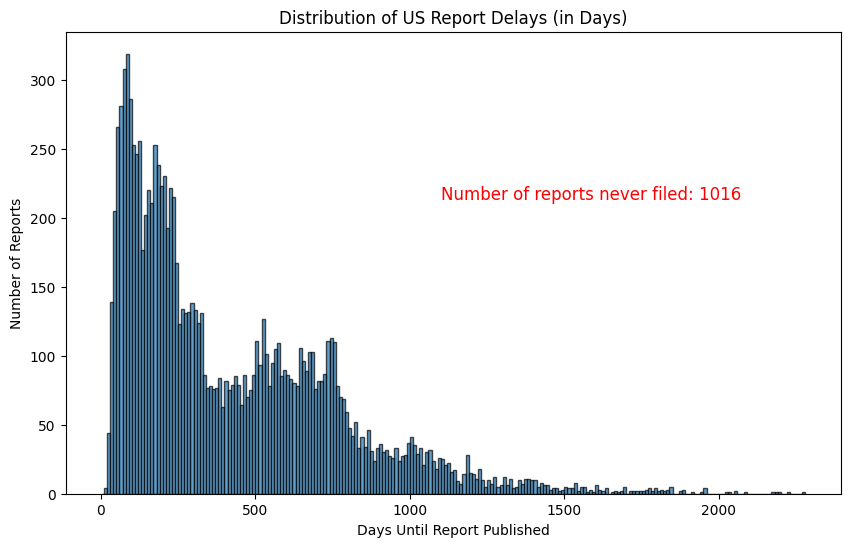

In [24]:
# calculate report delays
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days
num_unpublished = plane_data['ReportDelay'].isna().sum()  # count missing reports

# drop NaN values
report_delays = plane_data['ReportDelay'].dropna()

# plot histogram
plt.figure(figsize=(10, 6))
bins = np.arange(0, report_delays.max() + 10, 10)  # Bin width of 10 days
plt.hist(report_delays, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Days Until Report Published")
plt.ylabel("Number of Reports")
plt.title("Distribution of US Report Delays (in Days)")

# add caption for num of unfiled reports
plt.figtext(0.50, 0.60, f"Number of reports never filed: {num_unpublished}", fontsize=12, color='red')

plt.show()

C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\1664212994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days / 365


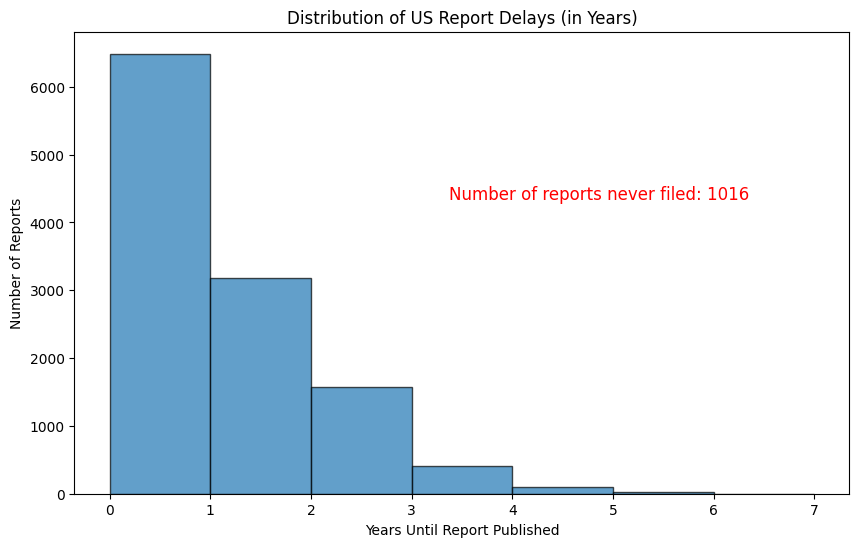

In [25]:
# calculate report delays in years
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days / 365
num_unpublished = plane_data['ReportDelay'].isna().sum()  # Count missing reports

# drop NaN values
report_delays = plane_data['ReportDelay'].dropna()

# plot
plt.figure(figsize=(10, 6))
bins = np.arange(0, report_delays.max() + 1, 1)  # Bin width of 1 year
plt.hist(report_delays, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Years Until Report Published")
plt.ylabel("Number of Reports")
plt.title("Distribution of US Report Delays (in Years)")

# Add caption for unpublished reports
plt.figtext(0.50, 0.60, f"Number of reports never filed: {num_unpublished}", fontsize=12, color='red')

plt.show()

In [19]:
# calculate the delay between event and report
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days # OriginalPublishDate

# create bins for delays
bins = [-np.inf, 120, 240, 360, 480, 600, 720, 840, np.inf]
labels = ['1-120', '121-240', '241-360', '361-480', '481-600', '601-720', '721-840', '840+']
plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)

# assign 'Not Filed' for missing values
plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')

# group by event year and delay category
heatmap_data = plane_data.groupby([plane_data['EventDate'].dt.year, 'DelayCategory']).size().unstack()

heatmap_data

C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\1525321754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days # OriginalPublishDate
C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\1525321754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)
C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\1525321754.py:10: SettingWithC

DelayCategory,1-120,121-240,241-360,361-480,481-600,601-720,721-840,840+,Not Filed
EventDate,,,,,,,,,
2015,461,206,135,111,96,84,69,148,2
2016,405,246,131,111,76,99,68,205,2
2017,319,262,84,80,136,115,69,265,0
2018,77,259,211,180,135,139,97,250,2
2019,4,321,204,81,177,75,66,374,0
2020,34,193,303,81,50,201,199,62,16
2021,117,429,119,63,163,156,142,23,3
2022,323,270,88,62,235,149,139,2,2
2023,359,232,103,135,82,45,18,0,244


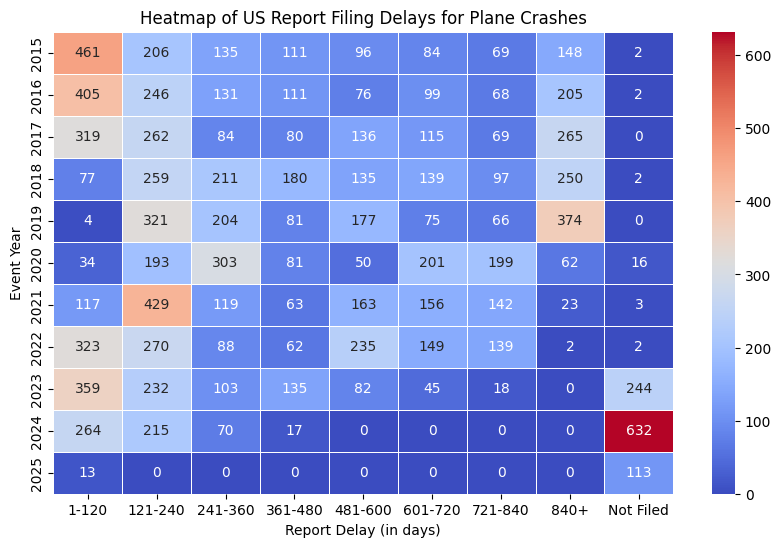

In [20]:
# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.xlabel('Report Delay (in days)')
plt.ylabel('Event Year')
plt.title('Heatmap of US Report Filing Delays for Plane Crashes')
plt.show()

In [21]:
bins = [-np.inf, 120, 240, 360, 480, 600, 720, 840, np.inf]
labels = ['1-120', '121-240', '241-360', '361-480', '481-600', '601-720', '721-840', '840+']
plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)

# assign 'Not Filed' for missing values
plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')

# group by event year and delay category
heatmap_data = plane_data.groupby([plane_data['EventDate'].dt.year, 'DelayCategory']).size().unstack()

# calculate by percentage
heatmap_data_percentage = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

heatmap_data_percentage

C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\3482484473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)
C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\3482484473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')
C:\Users\Oli\AppData\Local\Temp\ipykernel_34428\3482484473.py:9: FutureWarning: The defa

DelayCategory,1-120,121-240,241-360,361-480,481-600,601-720,721-840,840+,Not Filed
EventDate,,,,,,,,,
2015,35.137195,15.701220,10.289634,8.460366,7.317073,6.402439,5.259146,11.280488,0.152439
2016,30.156366,18.317200,9.754281,8.265078,5.658972,7.371556,5.063291,15.264334,0.148920
2017,23.984962,19.699248,6.315789,6.015038,10.225564,8.646617,5.187970,19.924812,0.000000
2018,5.703704,19.185185,15.629630,13.333333,10.000000,10.296296,7.185185,18.518519,0.148148
2019,0.307220,24.654378,15.668203,6.221198,13.594470,5.760369,5.069124,28.725038,0.000000
2020,2.985075,16.944688,26.602283,7.111501,4.389816,17.647059,17.471466,5.443371,1.404741
2021,9.629630,35.308642,9.794239,5.185185,13.415638,12.839506,11.687243,1.893004,0.246914
2022,25.433071,21.259843,6.929134,4.881890,18.503937,11.732283,10.944882,0.157480,0.157480
2023,29.474548,19.047619,8.456486,11.083744,6.732348,3.694581,1.477833,0.000000,20.032841


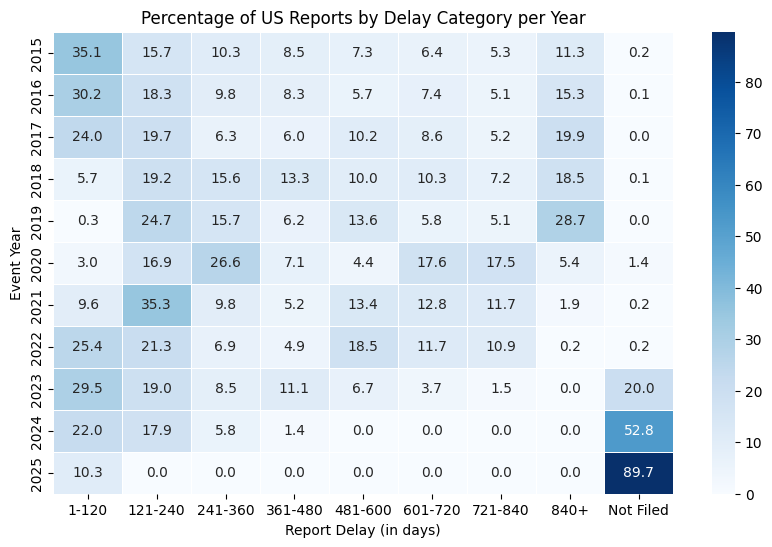

In [22]:
# resize
plt.figure(figsize=(10, 6))

# create heatmap
sns.heatmap(heatmap_data_percentage, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)

# labels and title
plt.xlabel("Report Delay (in days)")
plt.ylabel("Event Year")
plt.title("Percentage of US Reports by Delay Category per Year")

# plot
plt.show()